In [30]:
import pandas as pd
import boto3
import numpy as np
import os

# Image processing
import cv2
from PIL import Image

# Listing images from S3

In [20]:
key_path = "artifacts/002/CUG/images/"

In [21]:
class Connector:
    
    def __init__(self, bucket='test-bucket-glovocds'):
        self.session = boto3.Session()
        self.s3_client = self.session.client("s3")
        self.bucket = bucket
        
        
    def list_objects(self, key):
        paginator = self.s3_client.get_paginator('list_objects_v2')
        pages = paginator.paginate(Bucket=self.bucket, Prefix=key)
        l_objects = []
        for page in pages:
            for obj in page['Contents']:
                l_objects.append(obj["Key"])
        return l_objects


In [22]:
connector = Connector()

## Table of images names

In [23]:
# List full paths from S3
df_images = pd.DataFrame(connector.list_objects(key=key_path), columns = ["img_path"])

# Get filenames
df_images["img_name"] = df_images["img_path"].str.split("/").str[-1]

In [24]:
df_images.head()

,img_path,img_name
0,artifacts/002/CUG/images/0000000_0000000_14221...,0000000_0000000_1422139257.png
1,artifacts/002/CUG/images/0000001_0000001_16746...,0000001_0000001_1674682851.png
2,artifacts/002/CUG/images/0000002_0000002_17676...,0000002_0000002_1767626451.png
3,artifacts/002/CUG/images/0000003_0000003_20154...,0000003_0000003_2015496303.png
4,artifacts/002/CUG/images/0000004_0000004_11531...,0000004_0000004_1153188367.png


In [25]:
df_images.shape

(8011, 2)

# Loader of images from S3

In [42]:
# Dict to save images in memory
d_images = {img.split(".")[0]: np.array([]) for img in df_images["img_name"].values[:20]}

In [58]:
# Loop to download them in a dictionary
for img_name in d_images:
    img_s3_key = os.path.join(key_path, img_name + '.png')
    stream_body = connector.s3_client.get_object(
            Bucket=connector.bucket, 
            Key=img_s3_key
    ).get("Body")
    pil_im = Image.open(stream_body)
    d_images[img_name] = np.array(pil_im)

### Visualize one image

In [66]:
# Select an image from the dict
im_test = d_images["0000000_0000000_1422139257"]

In [67]:
type(im_test)

numpy.ndarray

In [68]:
im_test.shape

(224, 224, 3)

In [69]:
# Process it with PIL
im = Image.fromarray(np.uint8(im_test))

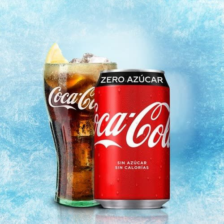

In [70]:
im